In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
import pandas as pd
df = pd.DataFrame(iris.data)
df['target'] = iris.target
df['flower'] = df.target.apply(lambda x: iris.target_names[x])
df.tail()

,0,1,2,3,target,flower
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target', 'flower'], axis='columns'), df.target)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
model.score(X_test, y_test)

0.9210526315789473

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 12,  1],
       [ 0,  2,  9]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

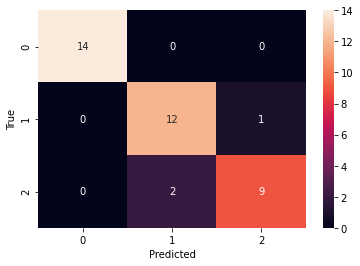

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')